In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
idx = pd.IndexSlice

import seaborn as sns
import investpy
import pyfolio as pf

import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
np.random.seed(42)

In [27]:
DATA_STORE = 'data/mom_results.h5'

In [28]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: data/mom_results.h5
/nse100/biweekly/results                               frame        (shape->[2723,3])
/nse100/biweekly_20/results                            frame        (shape->[2723,3])
/nse100/daily/results                                  frame        (shape->[2723,3])
/nse100/eq_wts/biweekly/positions                      frame        (shape->[2728,2])
/nse100/eq_wts/biweekly/returns                        series       (shape->[2728])  
/nse100/eq_wts/biweekly/transactions                   frame        (shape->[2150,5])
/nse100/eq_wts/biweekly_20/positions                   frame        (shape->[2728,2])
/nse100/eq_wts/biweekly_20/returns                     series       (shape->[2728])  
/nse100/eq_wts/biweekly_20/transactions                frame        (shape->[1581,5])
/nse100/eq_wts/daily/positions                         frame        (shape->[2728,2])
/nse100/eq_wts/daily/returns                           series       (sh

In [29]:
with pd.HDFStore(DATA_STORE) as store:
    rebalance_daily = (store['/nse100/daily/results'])
    rebalance_weekly = (store['/nse100/weekly/results'])
    rebalance_monthly = (store['/nse100/monthly/results'])
    rebalance_biweekly = (store['/nse100/biweekly/results'])
    rebalance_biweekly_20 = (store['/nse100/biweekly_20/results'])

In [30]:
rebalance_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [31]:
rebalance_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [32]:
rebalance_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [34]:
rebalance_biweekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [35]:
rebalance_biweekly_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [50]:
columns = ['stra_eqw_d', 'stra_riskp_d', 'stra_eqw_w', 'stra_riskp_w','stra_eqw_m','stra_riskp_m',
           'stra_eqw_biw','stra_riskp_biw','stra_eqw_biw_20','stra_riskp_biw_20',
           'nifty100']
results_all = pd.DataFrame(list(zip(rebalance_daily.stra_eqw, 
                            rebalance_daily.stra_riskp,
                            rebalance_weekly.stra_eqw,
                            rebalance_weekly.stra_riskp,
                            rebalance_monthly.stra_eqw,
                            rebalance_monthly.stra_riskp,
                            rebalance_biweekly.stra_eqw,
                            rebalance_biweekly.stra_riskp,
                            rebalance_biweekly_20.stra_eqw,
                            rebalance_biweekly_20.stra_riskp,
                            rebalance_daily.market)), columns=columns,index=rebalance_daily.index)
results_all.head()

,stra_eqw_d,stra_riskp_d,stra_eqw_w,stra_riskp_w,stra_eqw_m,stra_riskp_m,stra_eqw_biw,stra_riskp_biw,stra_eqw_biw_20,stra_riskp_biw_20,nifty100
Date,,,,,,,,,,,
2010-01-04 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006936
2010-01-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009751
2010-01-06 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001960
2010-01-07 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004277
2010-01-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003072


### Benchmark - Nifty100

In [51]:
# Performance of benchmark on key parameters
pf.show_perf_stats(results_all.nifty100)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,9.66%
Cumulative returns,170.847%
Annual volatility,17.227%
Sharpe ratio,0.62
Calmar ratio,0.25
Stability,0.90
Max drawdown,-38.104%


### Strategy - Equal Weight Daily Rebalance

In [52]:
pf.show_perf_stats(results_all.stra_eqw_d)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,16.358%
Cumulative returns,413.985%
Annual volatility,16.731%
Sharpe ratio,0.99
Calmar ratio,0.52
Stability,0.93
Max drawdown,-31.291%


### Strategy - Risk Parity Weight Daily Rebalance

In [53]:
pf.show_perf_stats(results_all.stra_riskp_d)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,16.874%
Cumulative returns,439.195%
Annual volatility,15.94%
Sharpe ratio,1.06
Calmar ratio,0.58
Stability,0.95
Max drawdown,-29.107%


### Strategy - Equal Weight Weekly Rebalance

In [54]:
pf.show_perf_stats(results_all.stra_eqw_w)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,14.601%
Cumulative returns,336.08%
Annual volatility,17.745%
Sharpe ratio,0.86
Calmar ratio,0.44
Stability,0.94
Max drawdown,-33.538%


### Strategy - Risk Parity Weekly Rebalance

In [55]:
pf.show_perf_stats(results_all.stra_riskp_w)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,14.601%
Cumulative returns,336.078%
Annual volatility,16.08%
Sharpe ratio,0.93
Calmar ratio,0.38
Stability,0.93
Max drawdown,-38.072%


### Strategy - Equal Weight Monthly Rebalance

In [56]:
pf.show_perf_stats(results_all.stra_eqw_m)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,13.943%
Cumulative returns,309.787%
Annual volatility,17.148%
Sharpe ratio,0.85
Calmar ratio,0.41
Stability,0.93
Max drawdown,-34.03%


### Strategy - Risk Parity Monthly Rebalance

In [57]:
pf.show_perf_stats(results_all.stra_riskp_m)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,15.333%
Cumulative returns,367.122%
Annual volatility,16.074%
Sharpe ratio,0.97
Calmar ratio,0.45
Stability,0.94
Max drawdown,-34.233%


### Strategy - Eq Wts biweekly Rebalance

In [58]:
pf.show_perf_stats(results_all.stra_eqw_biw)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,14.626%
Cumulative returns,337.096%
Annual volatility,17.601%
Sharpe ratio,0.86
Calmar ratio,0.45
Stability,0.94
Max drawdown,-32.175%


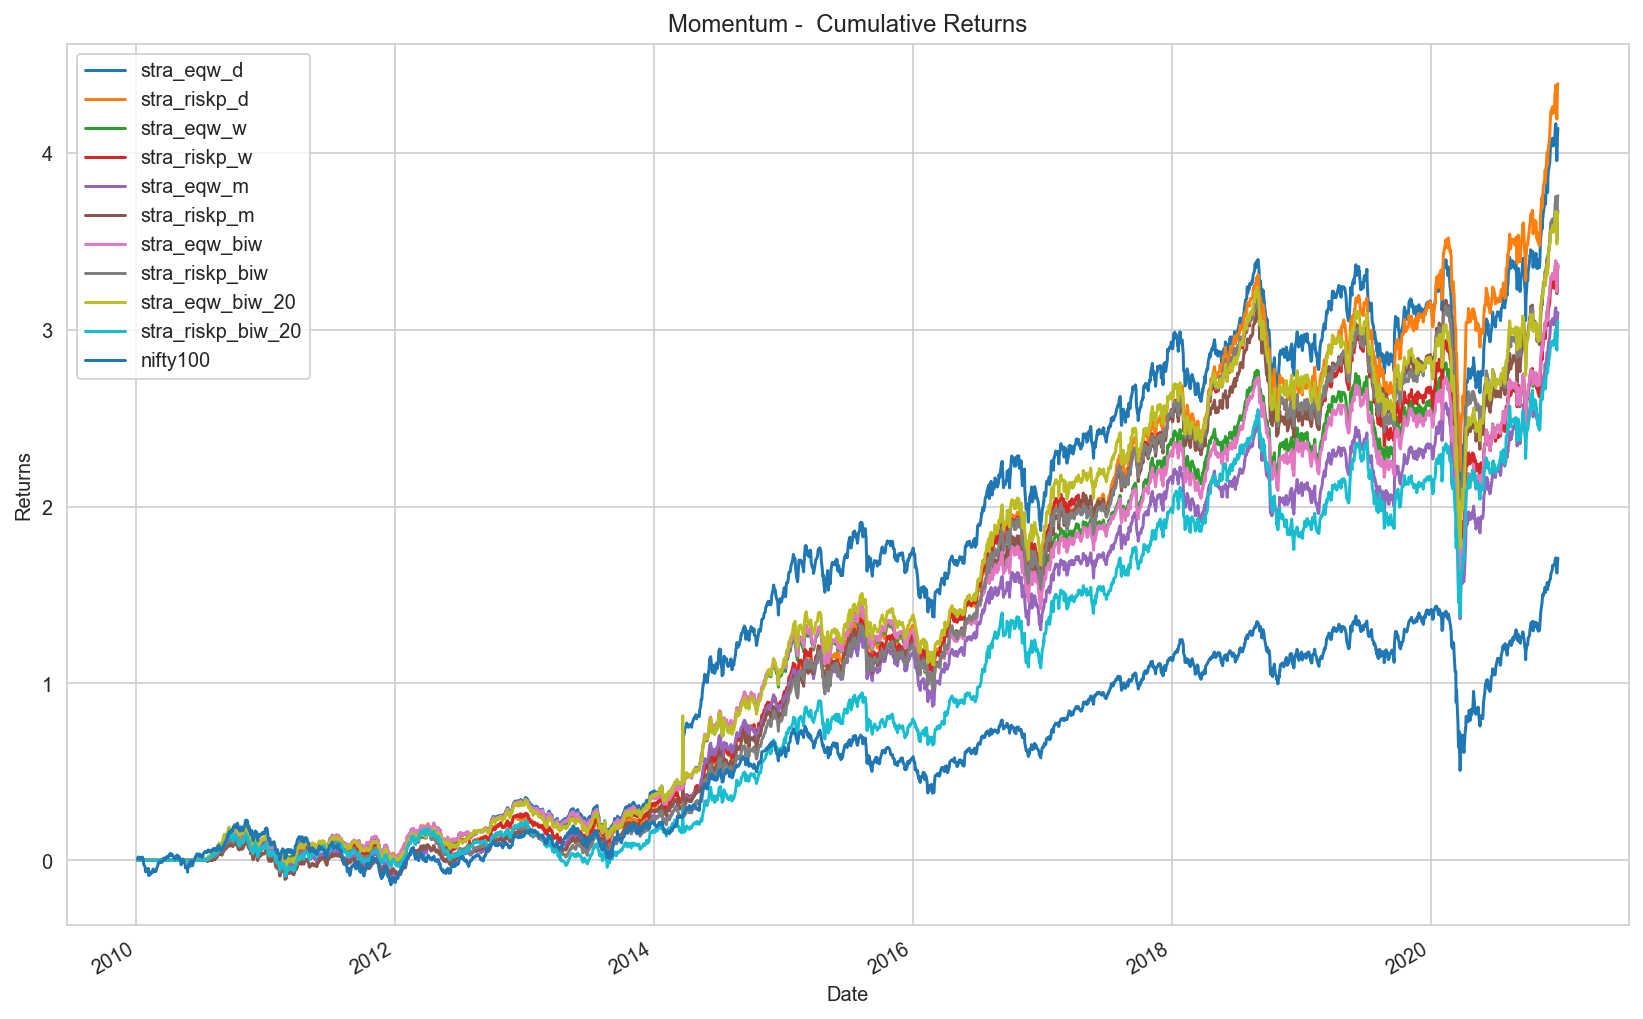

In [59]:
# Visulize the output
ax = ((1 * results_all + 1).cumprod()-1).plot(figsize=(14,9), title='Momentum -  Cumulative Returns')
ax.set_ylabel('Returns')
ax.grid(True)
ax.legend();

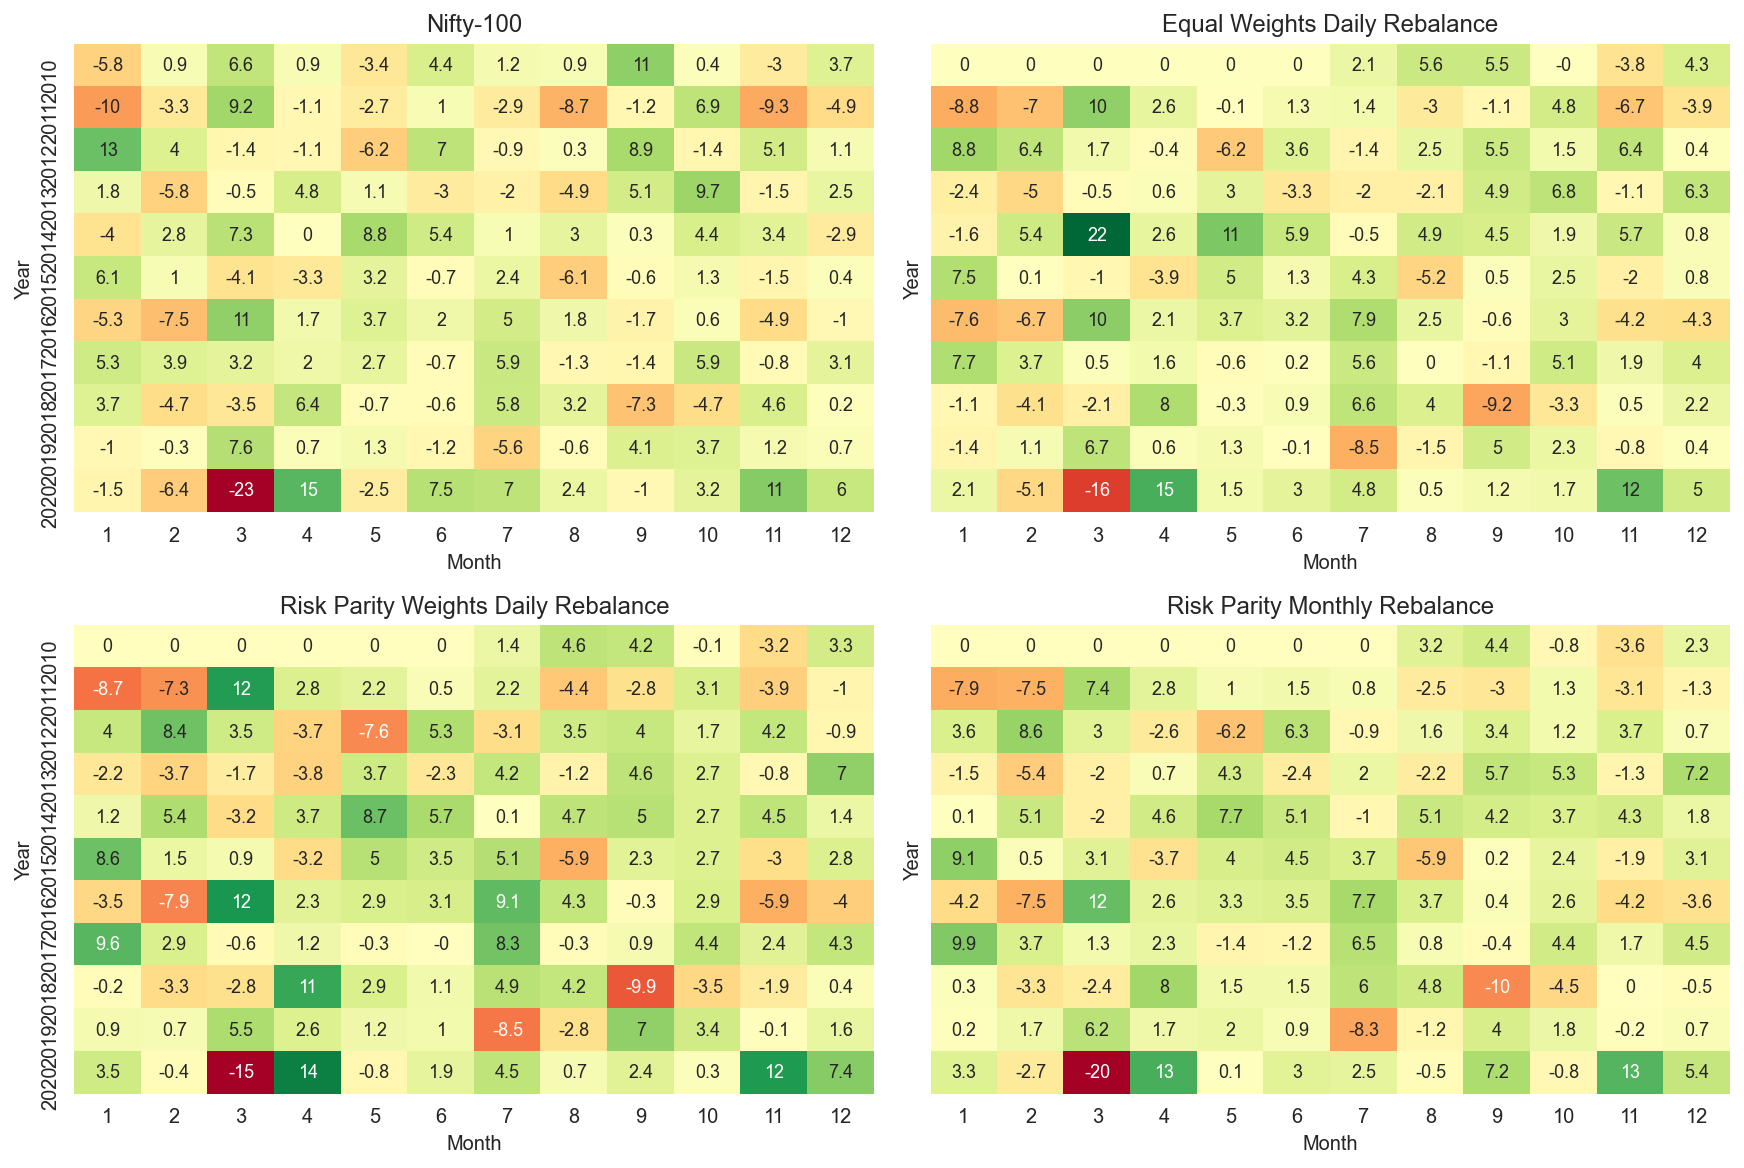

In [60]:
# plot performance
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8),constrained_layout=True, sharey=True)
axes = ax.flatten()

pf.plot_monthly_returns_heatmap(returns=results_all.nifty100, ax=axes[0])
axes[0].grid(True)
axes[0].set_title('Nifty-100')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_eqw_d, ax=axes[1])
axes[1].grid(True)
axes[1].set_title('Equal Weights Daily Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_riskp_d, ax=axes[2])
axes[2].grid(True)
axes[2].set_title('Risk Parity Weights Daily Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_riskp_m, ax=axes[3])
axes[3].grid(True)
axes[3].set_title('Risk Parity Monthly Rebalance');

# fig.suptitle('Strategy vs Nifty-100 - 2', fontsize=16, y=1.0)

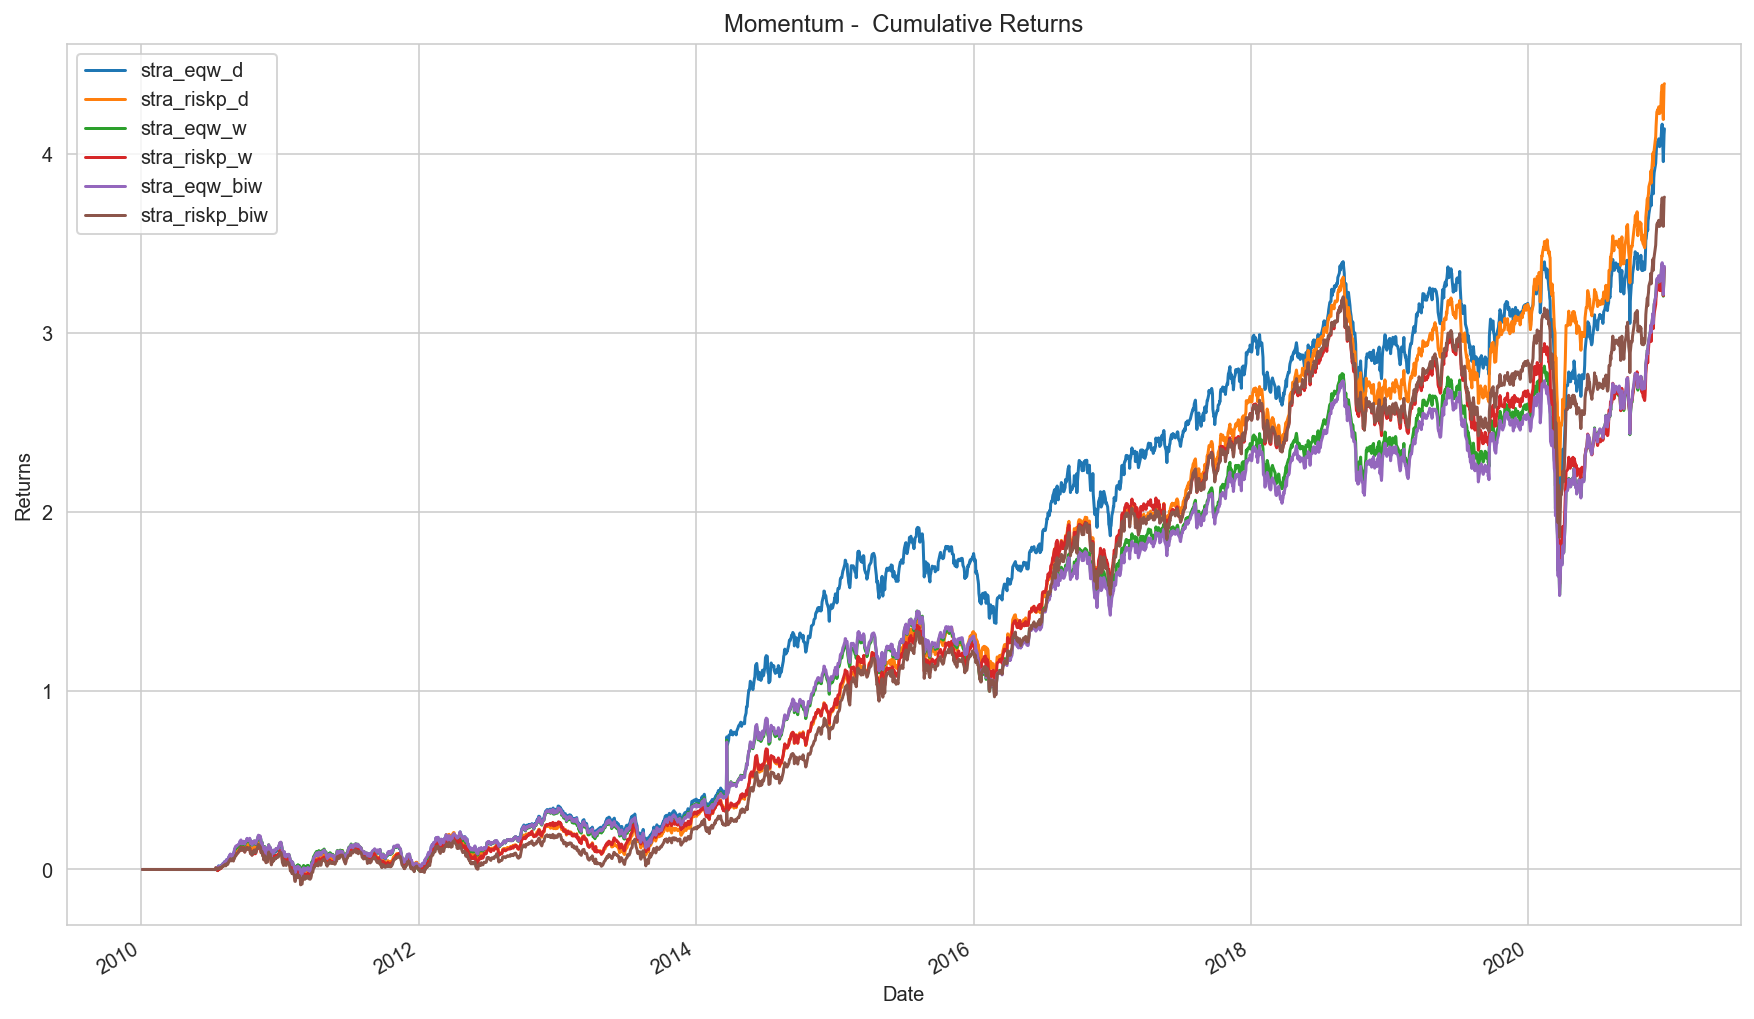

In [61]:
col = ['stra_eqw_d', 'stra_riskp_d', 'stra_eqw_w', 'stra_riskp_w', 'stra_eqw_biw','stra_riskp_biw',]

# Visulize the output
ax = ((1 * results_all[col] + 1).cumprod()-1).plot(figsize=(15,9), title='Momentum -  Cumulative Returns')
ax.set_ylabel('Returns')
ax.grid(True)
ax.legend();

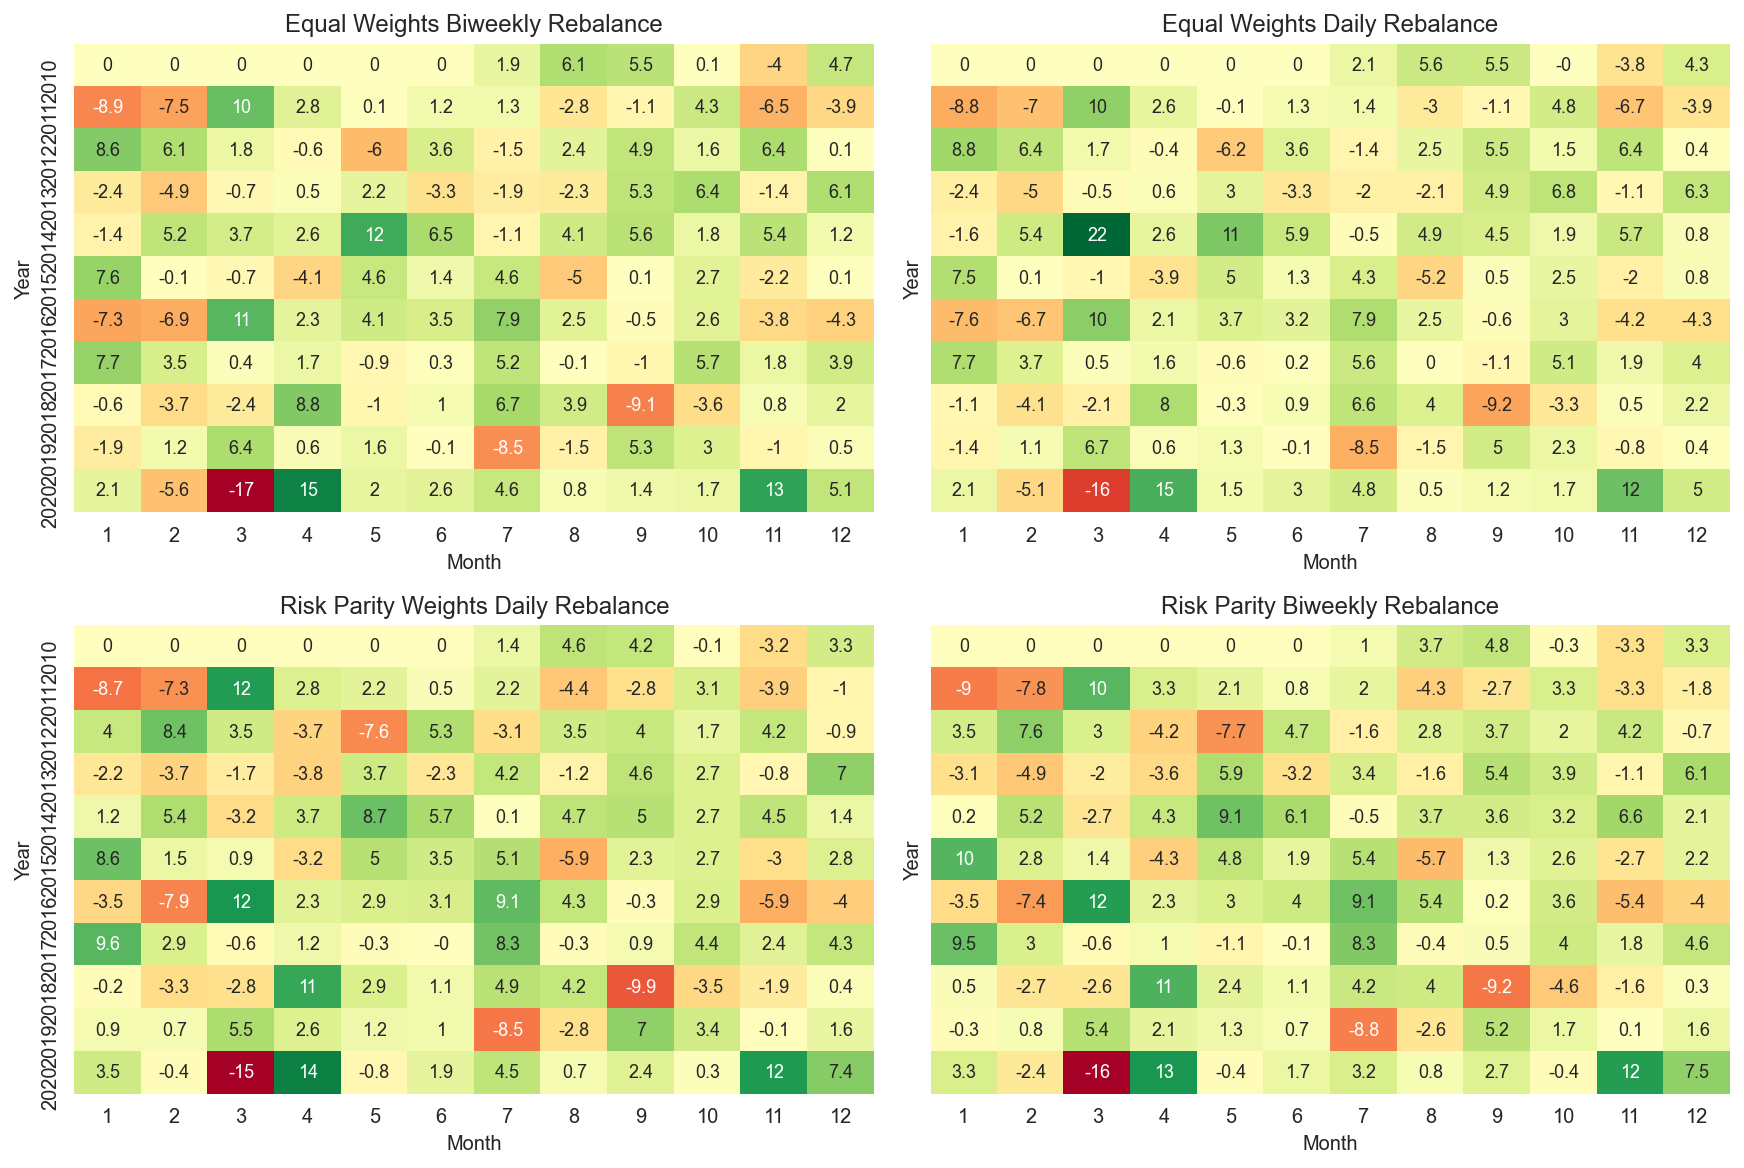

In [62]:
# plot performance
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8),constrained_layout=True, sharey=True)
axes = ax.flatten()

pf.plot_monthly_returns_heatmap(returns=results_all.stra_eqw_biw, ax=axes[0])
axes[0].grid(True)
axes[0].set_title('Equal Weights Biweekly Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_eqw_d, ax=axes[1])
axes[1].grid(True)
axes[1].set_title('Equal Weights Daily Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_riskp_d, ax=axes[2])
axes[2].grid(True)
axes[2].set_title('Risk Parity Weights Daily Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_riskp_biw, ax=axes[3])
axes[3].grid(True)
axes[3].set_title('Risk Parity Biweekly Rebalance');

### Strategy - Eq Wts biweekly Rebalance - 20 stocks

In [63]:
pf.show_perf_stats(results_all.stra_eqw_biw_20)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,15.314%
Cumulative returns,366.315%
Annual volatility,18.844%
Sharpe ratio,0.85
Calmar ratio,0.44
Stability,0.94
Max drawdown,-34.727%


### Strategy - Risk P Wts biweekly Rebalance - 20 stocks

In [64]:
pf.show_perf_stats(results_all.stra_riskp_biw_20)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,13.79%
Cumulative returns,303.868%
Annual volatility,17.036%
Sharpe ratio,0.84
Calmar ratio,0.42
Stability,0.93
Max drawdown,-32.959%


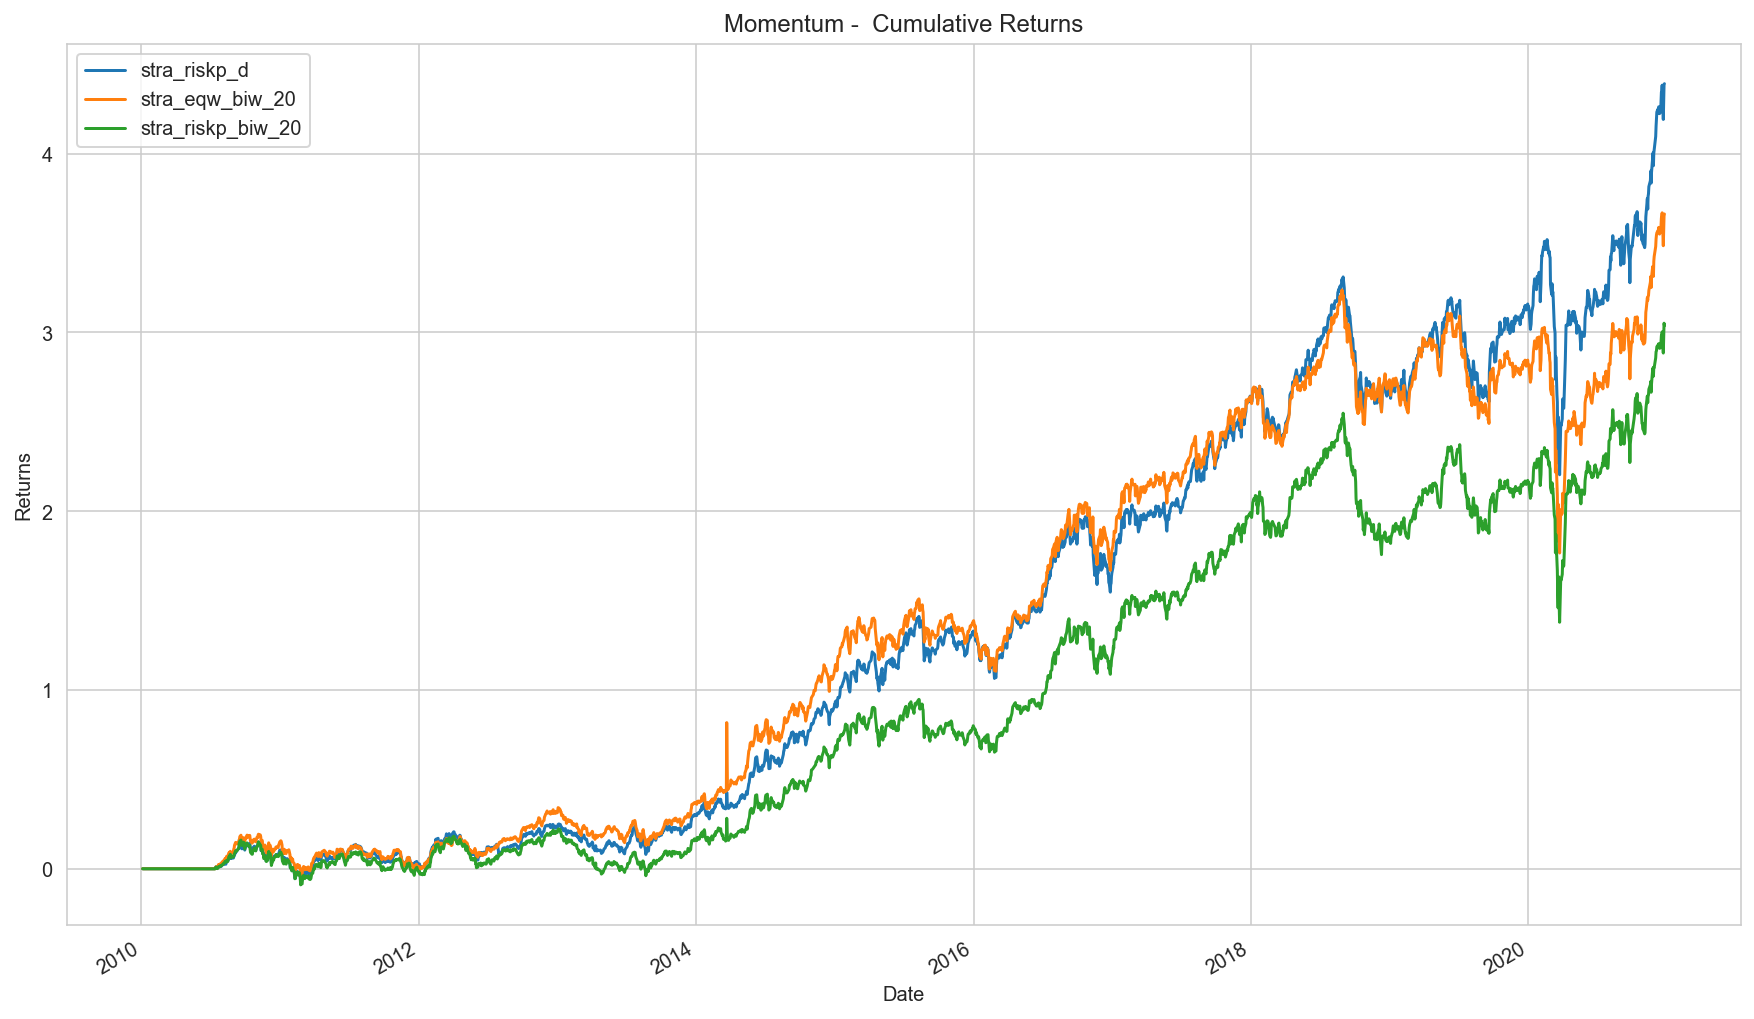

In [65]:
col = ['stra_riskp_d', 'stra_eqw_biw_20','stra_riskp_biw_20']

# Visulize the output
ax = ((1 * results_all[col] + 1).cumprod()-1).plot(figsize=(15,9), title='Momentum -  Cumulative Returns')
ax.set_ylabel('Returns')
ax.grid(True)
ax.legend();